# Расчетное задание ММФ

In [1]:
import numpy as np
import math 
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

### Выборка 28

In [2]:
#Part 1 sample
X1 = [-1.177, 0.079, 0.054, 0.592, -0.093, -0.612, -1.844, -0.128, -1.793, -0.454,  
     -0.168, -2.269, -2.190, -1.262, 0.088, 0.072, -1.736, -0.766, 0.286, -0.824,
      -3.157, -2.600, -0.484, 0.492, -0.550, -1.767, -1.766, -0.521, -2.543, -0.992, 
      -0.836, -1.138, -0.961, -1.639, -1.328, -1.814, -2.163, 0.380, -1.877, -0.732,  
      -1.606, 0.525, -0.669, -0.617, -1.108, -2.114, 0.481, -0.560, -0.669, -2.087]

#Part 2 sample
X2 = [0.002, 0.982, 0.664, 0.896, 0.024, 0.047, 0.114, 0.517, 0.761, 0.728,
     0.597, 0.899, 0.400, 0.079, 0.781, 0.139, 0.996, 0.022, 0.206, 0.303,
     0.446, 0.616, 0.794, 0.898, 0.531, 0.713, 0.332, 0.234, 0.395, 0.813]
eps = 0.08

## Часть 1

In [3]:
# Доверительный интервал  для параметра a при известном σ2
m = np.mean(X1)
h = math.sqrt(1.1 / len(X1)) * sp.stats.norm.ppf(1-eps/2)
print((m-h, m+h))

(-1.2309687078599958, -0.7116312921400042)


In [4]:
# Доверительный интервал для параметра a при неизвестном σ2
m, se = np.mean(X1), np.std(X1, ddof = 1)
h = se * sp.stats.t.ppf(1-eps/2, len(X1)-1) / math.sqrt(len(X1))
print((m-h, m+h))

(-1.209435512644101, -0.7331644873558989)


In [7]:
# Доверительный интервал для параметра σ2 при известном a
sum = 0
for i in range(len(X1)):
    sum += (X1[i] + 1) ** 2
sum /= len(X1)
h1 = len(X1) * sum / sp.stats.chi2.ppf(eps / 2, len(X1))
h2 = len(X1) * sum / sp.stats.chi2.ppf(1 - eps / 2, len(X1))
print((min(h1, h2), max(h1, h2)))

(0.6324052233949556, 1.2819270127475733)


In [9]:
# Доверительный интервал для параметра σ2 при неизвестном a 
h1 = (len(X1) - 1) * np.var(X1, ddof = 1) / sp.stats.chi2.ppf(eps / 2, len(X1) - 1)
h2 = (len(X1) - 1) * np.var(X1, ddof = 1) / sp.stats.chi2.ppf(1 - eps / 2, len(X1) - 1)
print((min(h1, h2), max(h1, h2)))

(0.6428008163280805, 1.3125524200848957)


### Проверка гипотезы однородности

In [10]:
# Критерий Фишера
n1, n2 = 20, 30
s1 = np.var(X1[:20], ddof = 1)
s2 = np.var(X1[20:], ddof = 1)
rho = max(s1, s2) / min(s1, s2) # s2 > s1
q1 = sp.stats.f.ppf(eps / 2, n2 - 1, n1 - 1)
q2 = sp.stats.f.ppf(1 - eps / 2, n2 - 1, n1 - 1)
print(rho)
print((min(q1, q2), max(q1, q2))) 

1.1539470556267055
(0.4887938446376142, 2.180321707437528)


In [11]:
# Критерий Стьюдента
n1, n2 = 20, 30
rho = math.sqrt(n1 * n2 / (n1 + n2)) * (np.mean(X1[:20])-np.mean(X1[20:])) / \
        math.sqrt(((n1 - 1) * np.var(X1[:20], ddof = 1) + (n2 - 1) * np.var(X1[20:], ddof = 1)) / (n1 + n2 - 2))
q1 = sp.stats.t.ppf(eps / 2, n1 + n2 - 2)
q2 = sp.stats.t.ppf(1 - eps / 2, n1 + n2 - 2)
print(rho)
print((min(q1, q2), max(q1, q2))) 

1.6465649919441834
(-1.7885467032422269, 1.7885467032422264)


## Часть 2

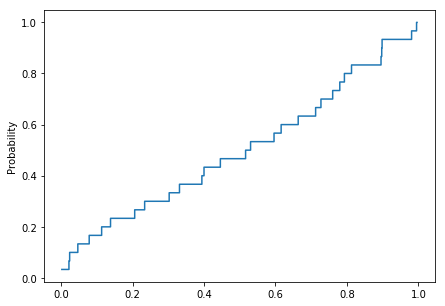

In [12]:
# Эмпирическая функция распределения выборки 2
ecdf = ECDF(X2)
grid = np.linspace(min(X2), max(X2), num = 1000)
y = ecdf(grid)
plt.figure(figsize=(7,5))
plt.ylabel('Probability');
plt.step(grid, y)
plt.show()

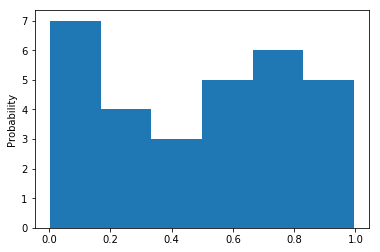

In [13]:
# Диаграмма выборки 2
plt.hist(X2, 6)
plt.ylabel('Probability');
plt.show()

In [14]:
# Критерий Колмогорова
ecdf = ECDF(X2)
x = np.linspace(min(X2), max(X2), num = 1000)
y = ecdf(x)
Dn = math.sqrt(len(X2)) * max(abs(x - y))
print(Dn, "Dn")
print(1 - sp.stats.kstwobign.cdf(Dn), " -- Реально достигнутый уровень значимости")
print((0.0, sp.stats.kstwobign.ppf(1 - eps)))

0.5149907890536563 Dn
0.953539182786864  -- Реально достигнутый уровень значимости
(0.0, 1.268623626323811)


In [15]:
# Критерий хи-квадрат
k = 6 # Число областей
delta = 1.0 / k
h1 = 0
X2 = sorted(X2)
num = np.zeros(k)

for j in range(k):
    for i in range(len(X2)):
        if (X2[i] >= h1) & (X2[i] < (h1 + delta)):
            num[j] += 1
    h1 += delta

sum = 0
p = 1.0 / k
for l in range(k):
    sum += ((num[l] - len(X2) * p) ** 2 ) / (len(X2) * p)
print(sum)
print(1 - sp.stats.chi2.cdf(sum, k-1), " -- Реально достигнутый уровень значимости")
print((0.0, sp.stats.chi2.ppf(1 - eps, k-1)))

2.0
0.8491450360846096  -- Реально достигнутый уровень значимости
(0.0, 9.836591284935054)
